ІНФОРМАЦІЯ ПРО ТАБЛИЦЮ.
Частка пропусків, що міститься в кожній колонці: 
Регіон   0.0
1950     7.1
1960     3.6
1970     3.6
1990     0.0
2000     0.0
2012     0.0
2014     0.0
2019     0.0
dtype: float64
Типи всіх стовпців:
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object
               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.

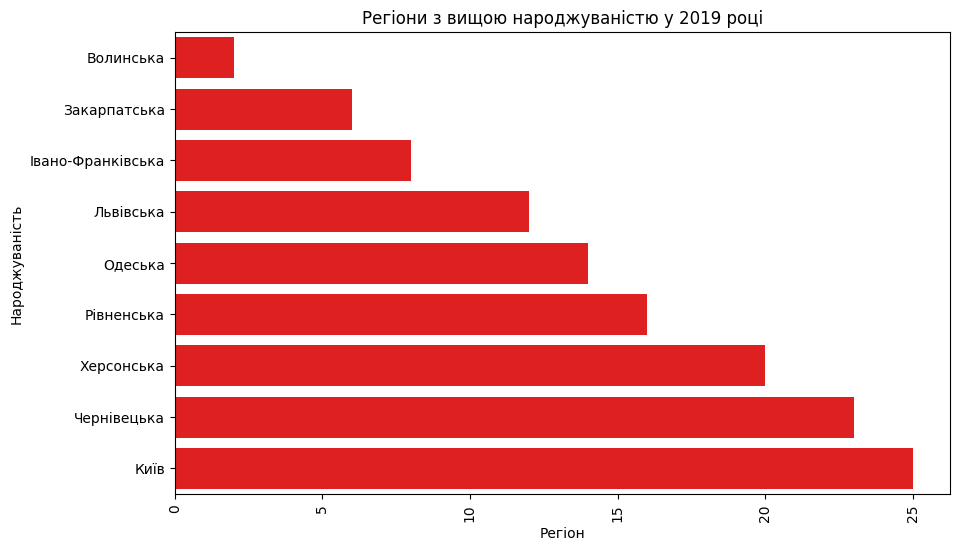


Рівень народжуваності у 2014 році середній по Україні 11.1
Регіон, у якому була найвища народжуваність у 2014 році: Рівненська


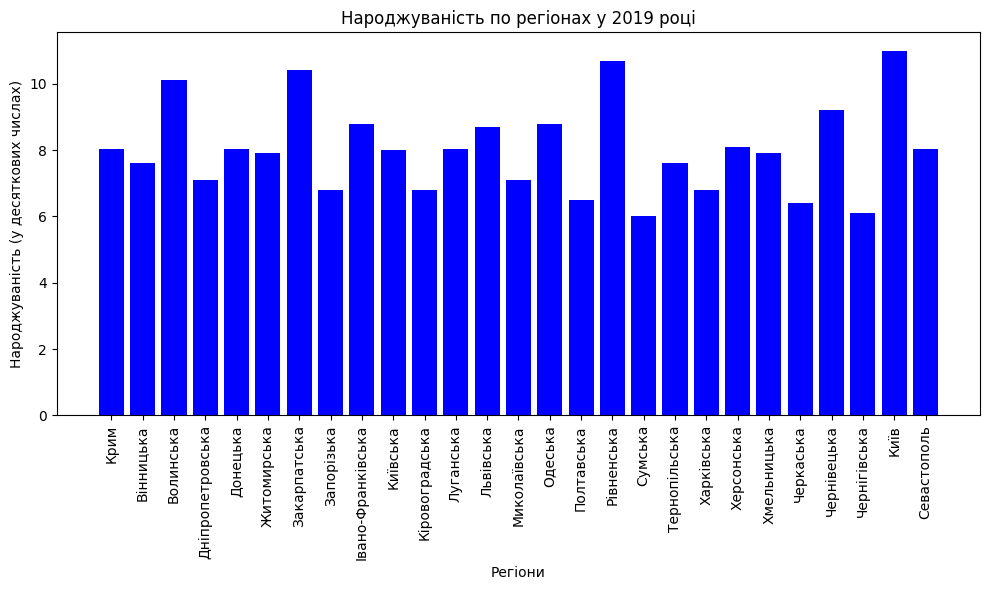

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(url)

# Шукаємо таблицю за назвою або вмістом
for table in tables:
    if "Регіон" in table.columns.values:
        missing_percentages = table.isnull().sum() / len(table) * 100
        print("ІНФОРМАЦІЯ ПРО ТАБЛИЦЮ.")
        print('Частка пропусків, що міститься в кожній колонці: ')
        print(missing_percentages)
        # Перетворюємо стовпці на тип float
        for column in table.columns:
            if column in ['1990', '2000', '2012']:
                # Перетворюємо стовпець на тип float64
                table[column] = pd.to_numeric(table[column], errors='coerce').astype('float64')
            elif column != 'Регіон':
                # Замінюємо коми на крапки у стовпці, тільки якщо вони є
                table[column] = table[column].apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
                # Переміщуємо крапку вліво на одну позицію
                table[column] = table[column].apply(lambda x: x.replace('.', '', 1) if isinstance(x, str) and x.count('.') > 1 else x)
                # Перетворюємо стовпець на тип float, але тільки якщо вони є числовими
                table[column] = pd.to_numeric(table[column], errors='coerce')
        
        # Ділимо всі дані в колонках, крім 'Регіон', на 10
        for column in table.columns:
            if column != 'Регіон':
                table[column] = table[column] / 10
        
        # Виведіть типи даних кожного стовпця
        print('Типи всіх стовпців:')
        print(table.dtypes)
        
        # Форматуємо дані для виведення з десятковим розділювачем
        pd.options.display.float_format = '{:.1f}'.format
        
        print(table)
        print('')
        print("ПЕРШІ РЯДКИ ТАБЛИЦІ")
        print(table.head(2))        
        print('')
        print("ІНФОРМАЦІЯ ПРО ТАБЛИЦЮ:")
        rows, columns = table.shape
        print(f"Кількість рядків: {rows}")
        print(f"Кількість стовпців: {columns}")
        print('Замінено значення "—" на значення NaN; визначено типи всіх стовпців за допомогою dataframe.dtypes')
        print('замінено типи нечислових колонок на числові')
        print("")
        print('ЗМІНА ТАБЛИЦІ.')
        print('Прибрано останній рядок таблиці, оскільки він містить загальні дані по Україні.')
        print('Замінено відсутні дані в стовпцях середніми значеннями цих стовпців')
       
        table = table.drop(table.index[-1])
        for column in table.columns:
            if column != 'Регіон':
        # Отримуємо середні дані по стовпцях, крім 'Регіон', в яких є значення NaN
        # Замінюємо NaN на середні значення
                mean_value = table[column].mean(skipna=True)
                table[column] = table[column].fillna(mean_value)
                print(f"Колонка {column} - середнє значення {mean_value:.1f}")
        print(table)
        print("")        
        mean_value = table['2019'].mean(skipna=False)
        print(f'Рівень народжуваності у 2019 році середній по Україні {mean_value:.1f}')
        # Визначаємо, у яких регіонах вища за середню народжуваність у 2019 році
        regions_above_average = table[table['2019'] > table['2019'].mean()]['Регіон']
        print("Регіони, у яких вища за середню народжуваність у 2019 році:")
        print(regions_above_average)
        
        
      # Створюємо червону діаграму
        plt.figure(figsize=(10, 6))
        sns.barplot(x=regions_above_average.index, y=regions_above_average.values, color='red')
        plt.title('Регіони з вищою народжуваністю у 2019 році')
        plt.xlabel('Регіон')
        plt.ylabel('Народжуваність')
        plt.xticks(rotation=90)  # Для зручності можна повернути мітки на 90 градусів
        plt.show()
        
        print("")        
        mean_value = table['2014'].mean(skipna=False)
        print(f'Рівень народжуваності у 2014 році середній по Україні {mean_value:.1f}')
        # Визначаємо, у якому регіоні була найвища народжуваність у 2014 році
        max_birth_rate_region = table.loc[table['2014'].idxmax(), 'Регіон']
        print(f"Регіон, у якому була найвища народжуваність у 2014 році: {max_birth_rate_region}")
        # Вибираємо дані для 2019 року
        data_2019 = table['2019']
        regions = table['Регіон']

        # Створюємо стовпчикову діаграму
        plt.figure(figsize=(10, 6))
        plt.bar(regions, data_2019, color='blue')
        plt.xlabel('Регіони')
        plt.ylabel('Народжуваність (у десяткових числах)')
        plt.title('Народжуваність по регіонах у 2019 році')
        plt.xticks(rotation=90)
        plt.tight_layout()

        # Виводимо діаграму
        plt.show()
        break